# supervised learning

## linear regression on kaggle data of student recruitment

# Importing Libraries

In [288]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import sklearn.model_selection as model_selection
import sklearn.preprocessing as pre
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as Rsquared
import statsmodels.api as sm

In [7]:
import os
os.getcwd()
os.chdir('C:\\Users\\USER\\Documents')

# importing Dataset

In [16]:
main_df = pd.read_csv('Student_recruitment.csv',  index_col = 'sl_no') # this set index directly to sl_no
print('Shape:', main_df.shape)
main_df.head()

Shape: (215, 15)


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [20]:
df = pd.read_csv('Student_recruitment.csv')
print('Shape:', df.shape)
main_df.head()
df = df.set_index('sl_no')

Shape: (215, 15)


In [21]:
print(df.shape)
main_df.head()

(215, 14)


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [22]:
# having better understanding on d data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB


In [24]:
#knowing the actual non values numbers
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [25]:
df.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [27]:
status_df = df[df['status'] == 'Not Placed']

In [29]:
status_df.shape

(67, 14)

In [32]:
status_df
print('shape of the dataframe:', status_df.shape, sep = '\n', end = '\n\n')
print('Number of Not placed:', status_df.status.value_counts(), sep = '\n', end = '\n\n')
print('shape of rows with salary as zero:', status_df.salary.isnull().sum(), sep = '\n', end = '\n\n')

shape of the dataframe:
(67, 14)

Number of Not placed:
Not Placed    67
Name: status, dtype: int64

shape of rows with salary as zero:
67



In [33]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


# separate column into numerical and categorical type

In [43]:
num_col = list(df.select_dtypes(exclude =['object']).columns)
cat_col = list(df.select_dtypes(include = ['object']).columns)
print('Numerical column:', num_col, end = '\n\n')
print('Categorical column:', cat_col)

Numerical column: ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

Categorical column: ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']


In [44]:
df[num_col].describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [45]:
df[cat_col].describe()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


In [47]:
df[num_col]

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,,,,,,
1,67.00,91.00,58.00,55.0,58.80,270000.0
2,79.33,78.33,77.48,86.5,66.28,200000.0
3,65.00,68.00,64.00,75.0,57.80,250000.0
4,56.00,52.00,52.00,66.0,59.43,NaN
5,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...
211,80.60,82.00,77.60,91.0,74.49,400000.0
212,58.00,60.00,72.00,74.0,53.62,275000.0
213,67.00,67.00,73.00,59.0,69.72,295000.0


In [48]:
df[cat_col]

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
sl_no,,,,,,,,
1,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
2,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
3,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
4,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
5,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...
211,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
212,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
213,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed


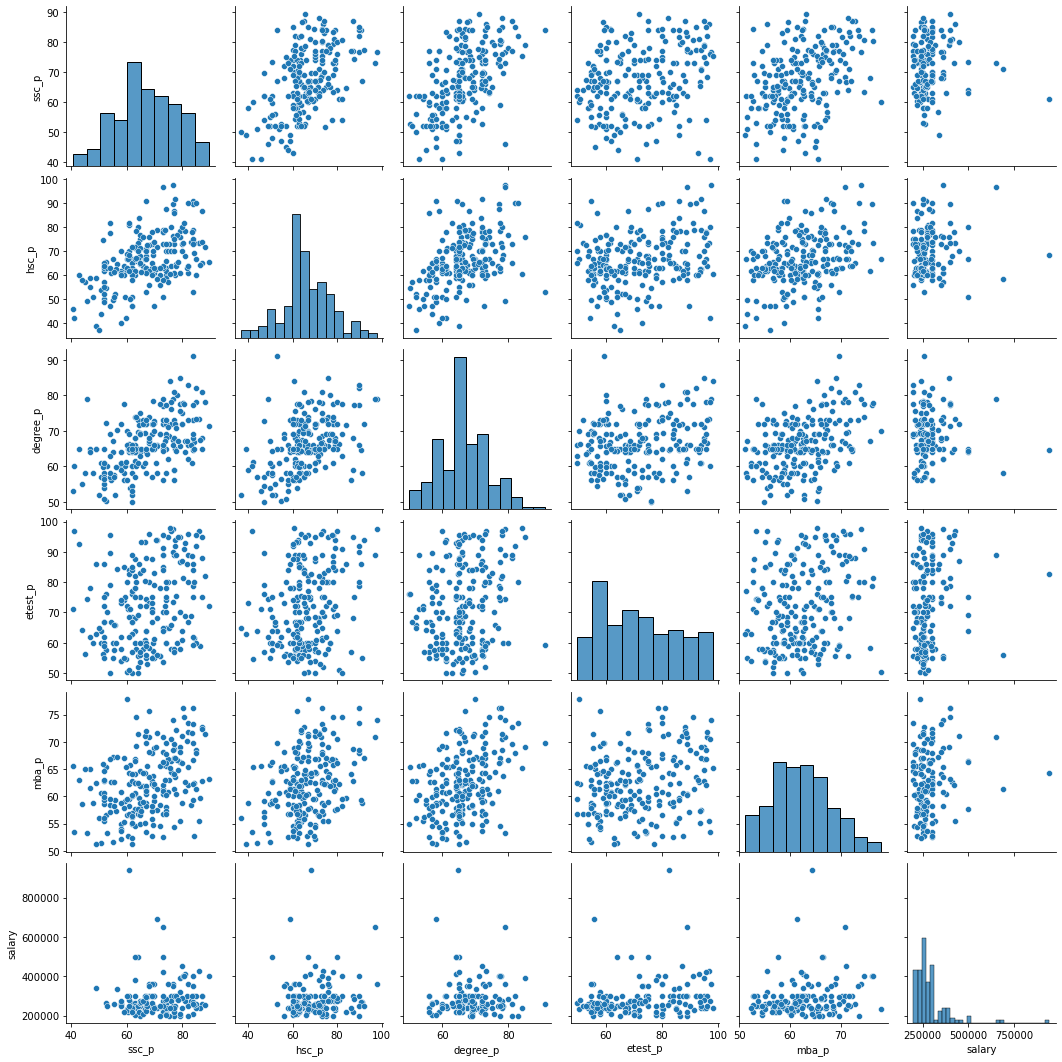

In [51]:
sns.pairplot(df[num_col])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary'>

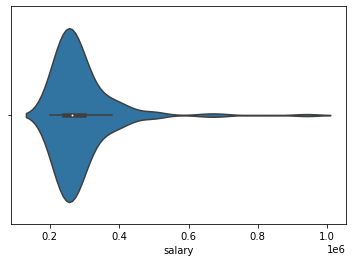

In [52]:
sns.violinplot(df.salary)

<AxesSubplot:ylabel='salary'>

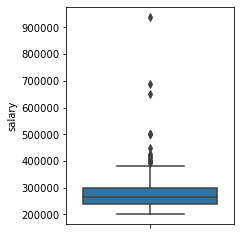

In [61]:
plt.figure(figsize = (3,4))
sns.boxplot(y = df.salary)

# Findings

## Insight 
There is correlation between the independent variable
the realtion bewteen independent variables and dependent variable(salary) is not very care because salry is skewed
 
The salary data is positively skewed from violin plot and box plot(Transformation required)

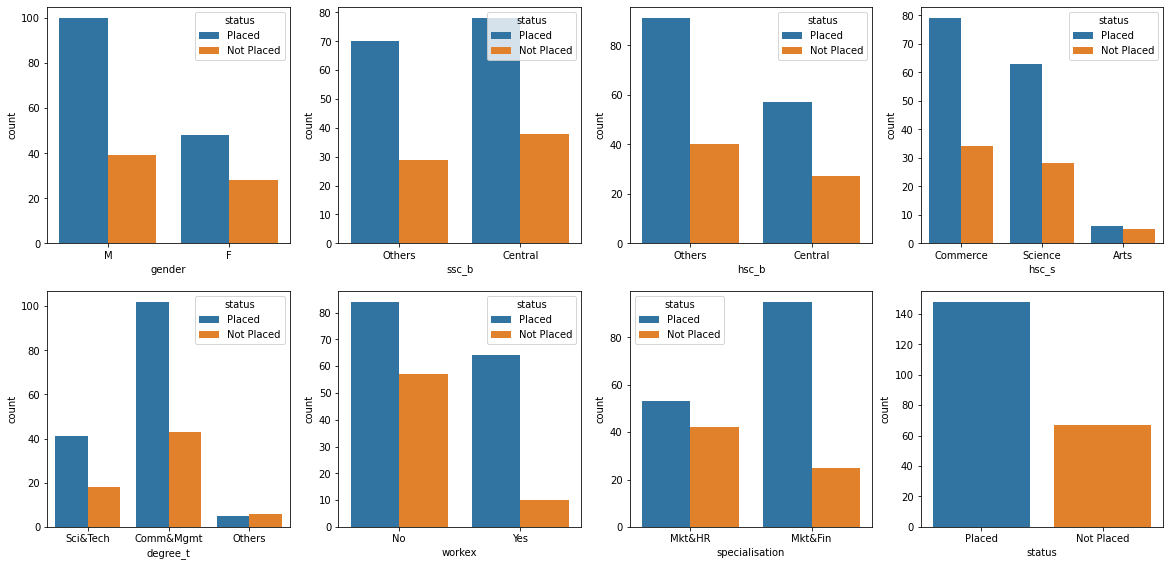

In [72]:
plt.figure(figsize =(20,20))

for i in range(len(cat_col)):
    plt.subplot(4, 4, i+1)
    if (i<7):
       sns.countplot(df[cat_col[i]], hue = df.status)
    else:
        sns.countplot(df[cat_col[i]])

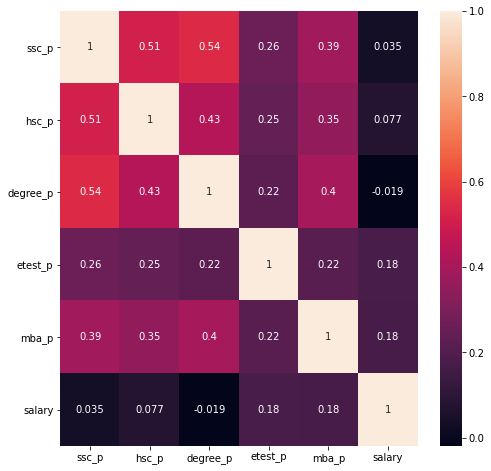

In [82]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot = True)
plt.yticks(rotation = 'horizontal')
plt.show()

# Insight

**ssc_p** and **hsc_p** is highly correlated with corr of 0.51.  
**sscp** and **degree_p** is highly correlated with corr of 0.54.  
**hsc_p** and **degree_p** is highly correlated with corr of 0.43.  
**mba_p** and **ssc_p** is highly correlated with corr of 0.39.  
**mba_p**and **hsc_p** is highly correlated with corr of 0.35.  
> removing **hsc_p**, **degree_p**, **mba_p** and keeping **ssc_p** is my recomendation since **ssc_p** explains the other ones


# Missing Values treatment and data transformation,

In [223]:
df = pd.read_csv('Student_recruitment.csv', index_col = 'sl_no' )
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [224]:
df = df.dropna(axis =0)
df= df.drop(['hsc_p', 'degree_p', 'mba_p'], axis = 1)
df

,gender,ssc_p,ssc_b,hsc_b,hsc_s,degree_t,workex,etest_p,specialisation,status,salary
sl_no,,,,,,,,,,,
1,M,67.00,Others,Others,Commerce,Sci&Tech,No,55.0,Mkt&HR,Placed,270000.0
2,M,79.33,Central,Others,Science,Sci&Tech,Yes,86.5,Mkt&Fin,Placed,200000.0
3,M,65.00,Central,Central,Arts,Comm&Mgmt,No,75.0,Mkt&Fin,Placed,250000.0
5,M,85.80,Central,Central,Commerce,Comm&Mgmt,No,96.8,Mkt&Fin,Placed,425000.0
8,M,82.00,Central,Central,Science,Sci&Tech,Yes,67.0,Mkt&Fin,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...
210,M,62.00,Central,Central,Commerce,Comm&Mgmt,No,67.0,Mkt&Fin,Placed,216000.0
211,M,80.60,Others,Others,Commerce,Comm&Mgmt,No,91.0,Mkt&Fin,Placed,400000.0
212,M,58.00,Others,Others,Science,Sci&Tech,No,74.0,Mkt&Fin,Placed,275000.0


In [225]:
df

,gender,ssc_p,ssc_b,hsc_b,hsc_s,degree_t,workex,etest_p,specialisation,status,salary
sl_no,,,,,,,,,,,
1,M,67.00,Others,Others,Commerce,Sci&Tech,No,55.0,Mkt&HR,Placed,270000.0
2,M,79.33,Central,Others,Science,Sci&Tech,Yes,86.5,Mkt&Fin,Placed,200000.0
3,M,65.00,Central,Central,Arts,Comm&Mgmt,No,75.0,Mkt&Fin,Placed,250000.0
5,M,85.80,Central,Central,Commerce,Comm&Mgmt,No,96.8,Mkt&Fin,Placed,425000.0
8,M,82.00,Central,Central,Science,Sci&Tech,Yes,67.0,Mkt&Fin,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...
210,M,62.00,Central,Central,Commerce,Comm&Mgmt,No,67.0,Mkt&Fin,Placed,216000.0
211,M,80.60,Others,Others,Commerce,Comm&Mgmt,No,91.0,Mkt&Fin,Placed,400000.0
212,M,58.00,Others,Others,Science,Sci&Tech,No,74.0,Mkt&Fin,Placed,275000.0


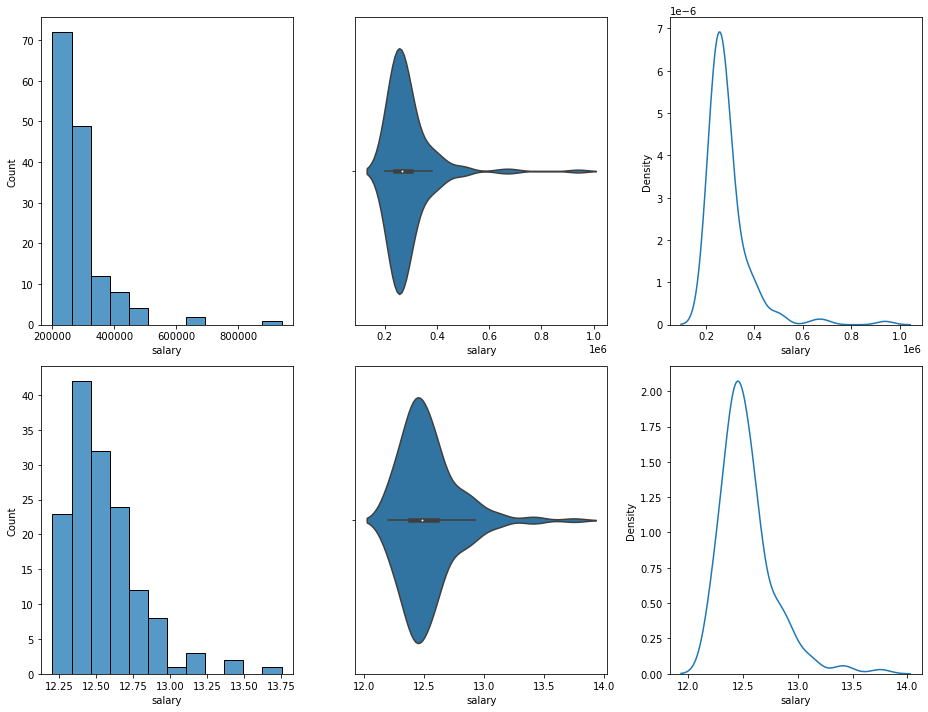

In [190]:
plt.figure(figsize = (13,10))
plt.subplot(2,3,1)
sns.histplot(df.salary, bins = 12)
plt.subplot(2,3,2)
sns.violinplot(df.salary)
plt.subplot(2,3,3)
sns.kdeplot(df.salary)
plt.subplot(2,3,4)
sns.histplot(np.log(df.salary), bins = 12)
plt.subplot(2,3,5)
sns.violinplot(np.log(df.salary))
plt.subplot(2,3,6)
sns.kdeplot(np.log(df.salary))
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='salary'>

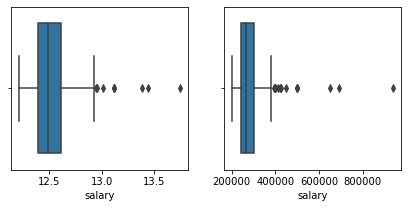

In [191]:
plt.figure(figsize = (7,3))
plt.subplot(121)
sns. boxplot(np.log(df.salary))
plt.subplot(122)
sns. boxplot(df.salary)

# Treating outliers

## knowing the exact datapoints that are outliers

In [192]:
Q1 = np.percentile(df.salary, 25 , interpolation = 'midpoint')
Q3 = np.percentile(df.salary, 75 , interpolation = 'midpoint')
IQR = Q3-Q1

In [193]:
Q1 = np.percentile(df.salary, 25)
Q3 = np.percentile(df.salary, 75)
print(Q1)
print (Q3)
print(IQR)

240000.0
300000.0
60000.0


In [226]:
upper = np.where(df.salary >= (Q3+1.5*IQR), df.index,1)
upper = upper[upper > 1]
print('upper:', upper)

lower = np.where(df.salary <= (Q1-1.5*IQR), df.index, 1)
lower = lower[lower >  1]
print('lower:', lower)

upper: [  5  22  40  54  78  86  96 120 129 146 151 164 175 178 211]
lower: []


## Alternatively 

In [227]:
df['transform_1'] = np.log(df['salary'])
df

,gender,ssc_p,ssc_b,hsc_b,hsc_s,degree_t,workex,etest_p,specialisation,status,salary,transform_1
sl_no,,,,,,,,,,,,
1,M,67.00,Others,Others,Commerce,Sci&Tech,No,55.0,Mkt&HR,Placed,270000.0,12.506177
2,M,79.33,Central,Others,Science,Sci&Tech,Yes,86.5,Mkt&Fin,Placed,200000.0,12.206073
3,M,65.00,Central,Central,Arts,Comm&Mgmt,No,75.0,Mkt&Fin,Placed,250000.0,12.429216
5,M,85.80,Central,Central,Commerce,Comm&Mgmt,No,96.8,Mkt&Fin,Placed,425000.0,12.959844
8,M,82.00,Central,Central,Science,Sci&Tech,Yes,67.0,Mkt&Fin,Placed,252000.0,12.437184
...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,62.00,Central,Central,Commerce,Comm&Mgmt,No,67.0,Mkt&Fin,Placed,216000.0,12.283034
211,M,80.60,Others,Others,Commerce,Comm&Mgmt,No,91.0,Mkt&Fin,Placed,400000.0,12.899220
212,M,58.00,Others,Others,Science,Sci&Tech,No,74.0,Mkt&Fin,Placed,275000.0,12.524526


In [228]:
Q_1 = df.transform_1.quantile(.25)
Q_3 = df.transform_1.quantile(.75)
IQr = Q_3-Q_1
UL = Q_3+IQr*1.5
LL = Q_1-IQr*1.5
upper = np.where(df.transform_1 > UL, df.index,-1)
upper = upper[upper > -1]
print('upper:', upper)

lower = np.where(df.transform_1 < LL, df.index, -1)
lower = lower[lower >  -1]
print('lower:', lower)

upper: [  5  54  78  96 120 151 164 175 178]
lower: []


In [229]:
Q_1, Q_3, IQr, UL, LL

(12.388394202324129,
 12.611537753638338,
 0.22314355131420882,
 12.946253080609651,
 12.053678875352816)

In [230]:
print('old_dataset:', df.shape)
print(len(upper))
df = df.drop(index = upper, axis = 0)
print('new shape:', df.shape)

old_dataset: (148, 12)
9
new shape: (139, 12)


In [231]:
df

,gender,ssc_p,ssc_b,hsc_b,hsc_s,degree_t,workex,etest_p,specialisation,status,salary,transform_1
sl_no,,,,,,,,,,,,
1,M,67.00,Others,Others,Commerce,Sci&Tech,No,55.00,Mkt&HR,Placed,270000.0,12.506177
2,M,79.33,Central,Others,Science,Sci&Tech,Yes,86.50,Mkt&Fin,Placed,200000.0,12.206073
3,M,65.00,Central,Central,Arts,Comm&Mgmt,No,75.00,Mkt&Fin,Placed,250000.0,12.429216
8,M,82.00,Central,Central,Science,Sci&Tech,Yes,67.00,Mkt&Fin,Placed,252000.0,12.437184
9,M,73.00,Central,Central,Commerce,Comm&Mgmt,No,91.34,Mkt&Fin,Placed,231000.0,12.350173
...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,62.00,Central,Central,Commerce,Comm&Mgmt,No,67.00,Mkt&Fin,Placed,216000.0,12.283034
211,M,80.60,Others,Others,Commerce,Comm&Mgmt,No,91.00,Mkt&Fin,Placed,400000.0,12.899220
212,M,58.00,Others,Others,Science,Sci&Tech,No,74.00,Mkt&Fin,Placed,275000.0,12.524526


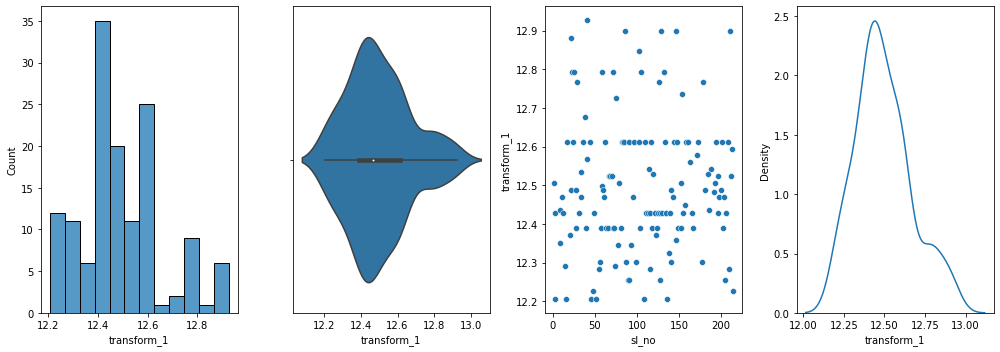

In [237]:
# Visualization after transformation
plt.figure(figsize = (14,5))
plt.subplot(1,4,1)
sns.histplot(df.transform_1, bins = 12)
plt.subplot(1,4,2)
sns.violinplot(df.transform_1)
plt.subplot(1,4,3)
sns.scatterplot(x =df.index, y = df.transform_1)
plt.subplot(1,4,4)
sns.kdeplot(df.transform_1)
plt.tight_layout()
plt.show()

In [236]:
print(df.transform_1.mean())
print(df.transform_1.median())

12.494286400705548
12.468436909997665


In [239]:
df = df.drop('salary', axis = 1)

In [240]:
df

,gender,ssc_p,ssc_b,hsc_b,hsc_s,degree_t,workex,etest_p,specialisation,status,transform_1
sl_no,,,,,,,,,,,
1,M,67.00,Others,Others,Commerce,Sci&Tech,No,55.00,Mkt&HR,Placed,12.506177
2,M,79.33,Central,Others,Science,Sci&Tech,Yes,86.50,Mkt&Fin,Placed,12.206073
3,M,65.00,Central,Central,Arts,Comm&Mgmt,No,75.00,Mkt&Fin,Placed,12.429216
8,M,82.00,Central,Central,Science,Sci&Tech,Yes,67.00,Mkt&Fin,Placed,12.437184
9,M,73.00,Central,Central,Commerce,Comm&Mgmt,No,91.34,Mkt&Fin,Placed,12.350173
...,...,...,...,...,...,...,...,...,...,...,...
210,M,62.00,Central,Central,Commerce,Comm&Mgmt,No,67.00,Mkt&Fin,Placed,12.283034
211,M,80.60,Others,Others,Commerce,Comm&Mgmt,No,91.00,Mkt&Fin,Placed,12.899220
212,M,58.00,Others,Others,Science,Sci&Tech,No,74.00,Mkt&Fin,Placed,12.524526


# Label Encoding

In [244]:
labelencoder = pre.LabelEncoder()
for i in cat_col:
    df[i]= labelencoder.fit_transform(df[i])
df[cat_col].head(4)

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
sl_no,,,,,,,,
1,1,1,1,1,2,0,1,0
2,1,0,1,2,2,1,0,0
3,1,0,0,0,0,0,0,0
8,1,0,0,2,2,1,0,0


In [253]:
df

,gender,ssc_p,ssc_b,hsc_b,hsc_s,degree_t,workex,etest_p,specialisation,status,transform_1
sl_no,,,,,,,,,,,
1,1,67.00,1,1,1,2,0,55.00,1,0,12.506177
2,1,79.33,0,1,2,2,1,86.50,0,0,12.206073
3,1,65.00,0,0,0,0,0,75.00,0,0,12.429216
8,1,82.00,0,0,2,2,1,67.00,0,0,12.437184
9,1,73.00,0,0,1,0,0,91.34,0,0,12.350173
...,...,...,...,...,...,...,...,...,...,...,...
210,1,62.00,0,0,1,0,0,67.00,0,0,12.283034
211,1,80.60,1,1,1,0,0,91.00,0,0,12.899220
212,1,58.00,1,1,2,2,0,74.00,0,0,12.524526


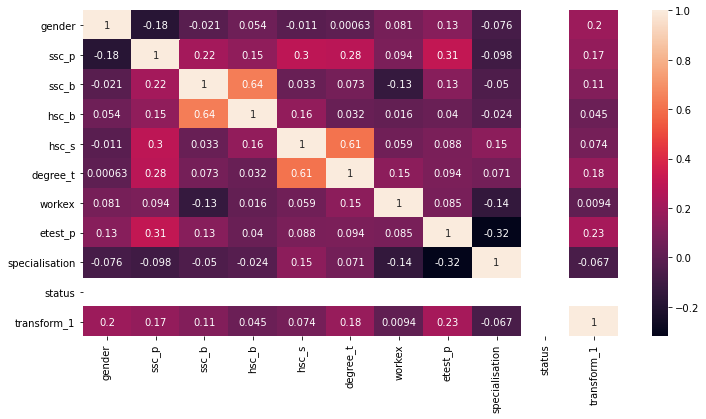

In [248]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(), annot = True)
plt.show()

## Insight  
Remove hsc_b as it corelate with ssc_b and av small correlation to salary  
Remove status as it is constant accross all the variable  
Remove workex as it has small correlation to salary  
Remove hsc_s as it corelate with degree_t and av small correlation to salary  
Remove specialization as it contribute very little to depenedent variable

In [255]:
df = df.drop(['hsc_b', 'hsc_s', 'workex', 'specialisation', 'status'], axis = 1)


In [256]:
df

,gender,ssc_p,ssc_b,degree_t,etest_p,transform_1
sl_no,,,,,,
1,1,67.00,1,2,55.00,12.506177
2,1,79.33,0,2,86.50,12.206073
3,1,65.00,0,0,75.00,12.429216
8,1,82.00,0,2,67.00,12.437184
9,1,73.00,0,0,91.34,12.350173
...,...,...,...,...,...,...
210,1,62.00,0,0,67.00,12.283034
211,1,80.60,1,0,91.00,12.899220
212,1,58.00,1,2,74.00,12.524526


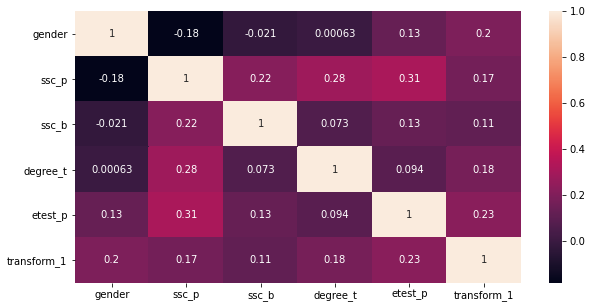

In [261]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True)
plt.yticks(rotation = 'horizontal')
plt.show()

# Building a Model

In [295]:
X = df.drop('transform_1', axis = 1)
Y = df['transform_1']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size= 0.2, train_size=0.8, random_state= 1234 )
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((111, 5), (28, 5), (111,), (28,))

In [296]:
Y_test = np.exp(Y_test)

In [298]:
#fitting the values to the training set
Y_test = np.exp(Y_test)
lr = lr()
lr.fit(X_train, Y_train)
print(lr.intercept_)
print(lr.coef_)
print(Rsquared)

12.136196268918
[0.07847667 0.0022526  0.01162838 0.03368894 0.00170075]
<function r2_score at 0x000001A396FCA790>


In [299]:
#testing the model
y_pred = lr.predict(X_test)
y_pred = np.exp(y_pred)
print('mean square error:', MSE(Y_test, y_pred))
print('Root mean square error:', math.sqrt(MSE(Y_test, y_pred)))
print('R squared:', Rsquared(Y_test, y_pred))

mean square error: 2162596734.118235
Root mean square error: 46503.72817439732
R squared: 0.08559214641698665


In [289]:
x = X_train
y = Y_train
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            transform_1   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     3.102
Date:                Sat, 06 May 2023   Prob (F-statistic):             0.0119
Time:                        12:10:40   Log-Likelihood:                 46.714
No. Observations:                 111   AIC:                            -81.43
Df Residuals:                     105   BIC:                            -65.17
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1362      0.139     87.376      0.0

### Insight
The model is not okay bacause the Rsquared of 0.087 is very bad

# Stepwise Regression

In [311]:
def accuracy(col_list):
    # set dependent and independent variable
    X = df[col_list]
    Y = df['transform_1']
    
    # divide into train and test data
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size= 0.2,
    train_size=0.8, random_state= 1234 )
    X_train.shape, X_test.shape, Y_train.shape, Y_test.shape
    
    # returning Y_test back to original number 
    Y_test = np.exp(Y_test)
    
    # fitting the model to the training data
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(X_train, Y_train)
    #print(lr.intercept_)
    #print(lr.coef_)
    #print(Rsquared)
    
    #printing out the the coefficient of the variation
    #testing the model
    y_pred = lr.predict(X_test)
    y_pred = np.exp(y_pred)
    print('mean square error:', MSE(Y_test, y_pred))
    print('Root mean square error:', math.sqrt(MSE(Y_test, y_pred)))
    print('R squared:', Rsquared(Y_test, y_pred))

In [312]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'degree_t', 'etest_p', 'transform_1'], dtype='object')

In [322]:
#testing all columns
col_list = ['gender', 'ssc_p', 'ssc_b', 'degree_t', 'etest_p']
accuracy(col_list)

mean square error: 2162596734.118235
Root mean square error: 46503.72817439732
R squared: 0.08559214641698665


In [324]:
#removing gender and keeping gender as Rsquared decreases
col_list.pop(col_list.index('gender'))
print('columns considered:', col_list)
accuracy(col_list)
col_list.append('gender')

columns considered: ['ssc_p', 'ssc_b', 'degree_t', 'etest_p']
mean square error: 2179830470.74666
Root mean square error: 46688.65462557965
R squared: 0.07830522885579905


In [325]:
#removing 'ssc_p' as Rsquared increases
col_list.pop(col_list.index('ssc_p'))
print('columns considered:', col_list)
accuracy(col_list)
#col_list.append('gender')

columns considered: ['ssc_b', 'degree_t', 'etest_p', 'gender']
mean square error: 2155554540.6276217
Root mean square error: 46427.94999380892
R squared: 0.08856978757064071


In [327]:
#removing 'ssc_b' and keeping ssc_b as Rsquared decreases
col_list.pop(col_list.index('ssc_b'))
print('columns considered:', col_list)
accuracy(col_list)
col_list.append('ssc_b')

columns considered: ['degree_t', 'etest_p', 'gender']
mean square error: 2196860937.323651
Root mean square error: 46870.68313267528
R squared: 0.07110425969566903


In [329]:
#removing 'degree_t' as Rsquared increases
col_list.pop(col_list.index('degree_t'))
print('columns considered:', col_list)
accuracy(col_list)
#col_list.append('degree_t')

columns considered: ['etest_p', 'gender', 'ssc_b']
mean square error: 2120365892.4698074
Root mean square error: 46047.430899777755
R squared: 0.10344855610147097


In [330]:
#removing 'etest_p' and keeping 'etest_p' as Rsquared decreases
col_list.pop(col_list.index('etest_p'))
print('columns considered:', col_list)
accuracy(col_list)
col_list.append('etest_p')

columns considered: ['gender', 'ssc_b']
mean square error: 2245804761.9567103
Root mean square error: 47389.9225780831
R squared: 0.050409408490732055


# Results and Conclusions

In [333]:
print('columns considered:', col_list)
accuracy(col_list)

columns considered: ['gender', 'ssc_b', 'etest_p']
mean square error: 2120365892.469809
Root mean square error: 46047.43089977778
R squared: 0.10344855610147019


### Insights:
It was prominent from the scatterplot that dependent variables follows no specific trend  
Stepwise regression filters the independent variable very well so that the Rsquared values is maximized  
I can conclude that the indepent variable is not the cause of the dependent variable